# Final Project

## Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.


In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

os.chdir('C:\BTS_Master\ClassicalDataAnalysis\project')

In [2]:
df = pd.read_csv('mammographic_masses.data.txt', na_values='?', header=None, names=['BI_RADS', 'age', 'shape', 'margin', 'density', 'severity'])

In [3]:
df.head()

,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


Evaluate whether the data needs cleaning; your model is only as good as the data it's given. Hint: use describe() on the dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI_RADS     959 non-null float64
age         956 non-null float64
shape       930 non-null float64
margin      913 non-null float64
density     885 non-null float64
severity    961 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


In [5]:
df.describe()

,BI_RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


There are quite a few missing values in the data set. Before we just drop every row that's missing data, let's make sure we don't bias our data in doing so. Does there appear to be any sort of correlation to what sort of data has missing fields? If there were, we'd have to try and go back and fill that data in.

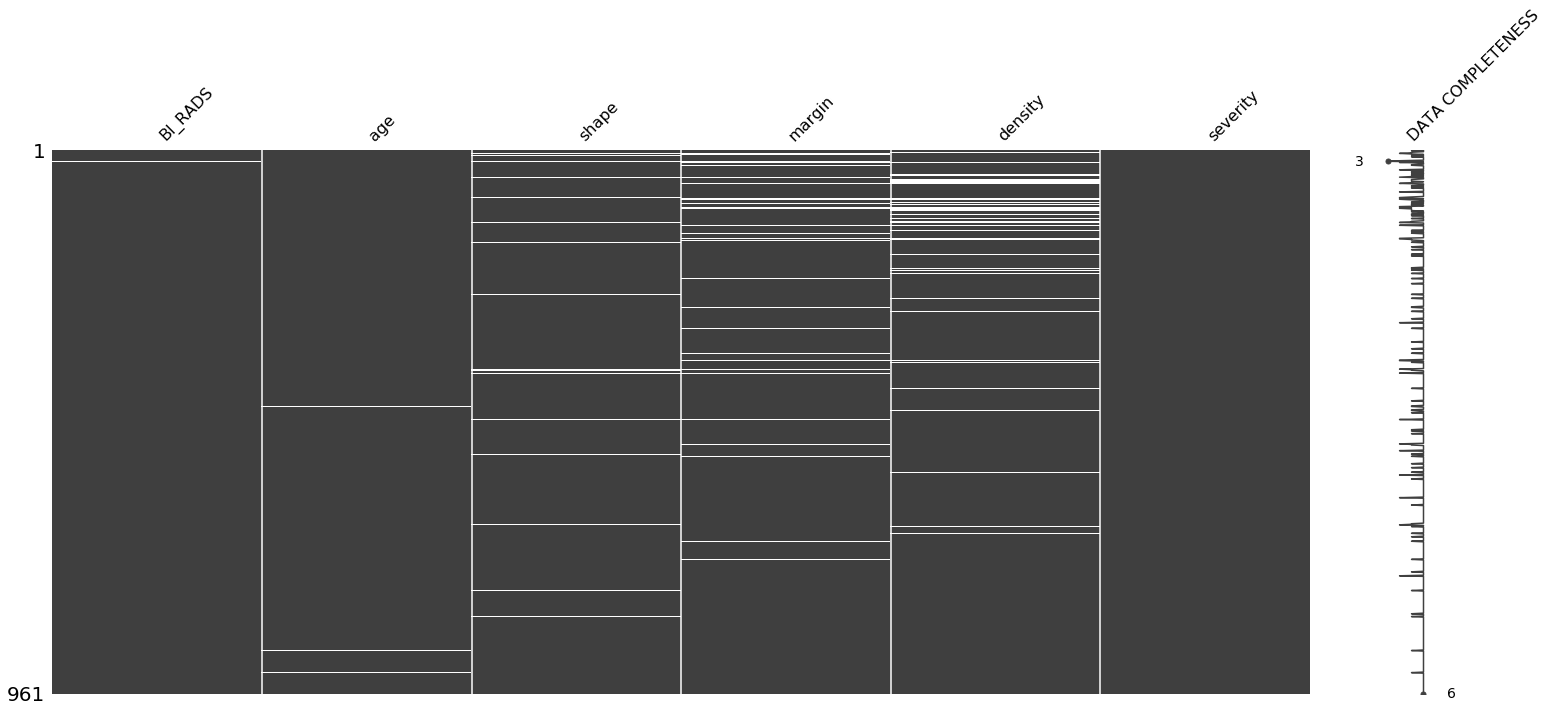

In [6]:
import missingno as msno
msno.matrix(df, labels=True)

#### Here the values missing seem to be random, lets analyse further the features with more missing values

In [7]:
df[(np.isnan(df.density))].drop('BI_RADS', axis=1).describe()

,age,shape,margin,density,severity
count,76.000000,72.000000,60.000000,0.0,76.000000
mean,50.447368,2.097222,2.166667,NaN,0.289474
std,13.174111,1.076768,1.508919,NaN,0.456532
min,23.000000,1.000000,1.000000,NaN,0.000000
25%,42.250000,1.000000,1.000000,NaN,0.000000
50%,50.500000,2.000000,1.000000,NaN,0.000000
75%,59.250000,3.000000,4.000000,NaN,1.000000
max,77.000000,4.000000,5.000000,NaN,1.000000


In [8]:
df.drop('BI_RADS', axis=1).describe()

,age,shape,margin,density,severity
count,956.000000,930.000000,913.000000,885.000000,961.000000
mean,55.487448,2.721505,2.796276,2.910734,0.463059
std,14.480131,1.242792,1.566546,0.380444,0.498893
min,18.000000,1.000000,1.000000,1.000000,0.000000
25%,45.000000,2.000000,1.000000,3.000000,0.000000
50%,57.000000,3.000000,3.000000,3.000000,0.000000
75%,66.000000,4.000000,4.000000,3.000000,1.000000
max,96.000000,4.000000,5.000000,4.000000,1.000000


#### the severity has a significant difference in the average between datasets

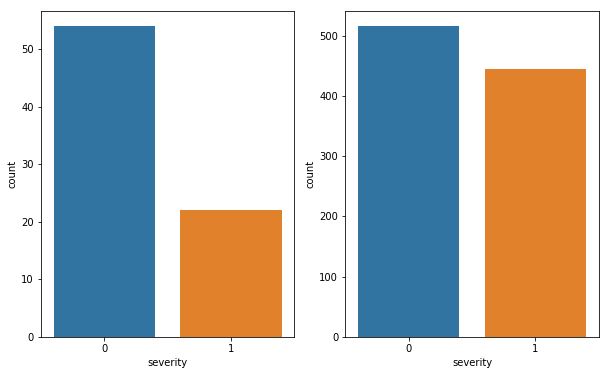

In [9]:
fig, axs = plt.subplots(1,2, figsize=(10,6))
sns.countplot(df[(np.isnan(df.density))]['severity'], ax= axs[0])
sns.countplot(df['severity'], ax= axs[1])

#### makes me wonder if the missing values are really random, we have, porportionaly, a lot more cases with 0 severity where the feature Density is missing than in the complete dataset

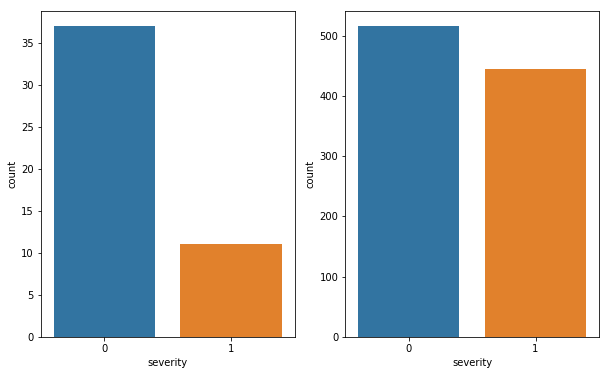

In [10]:
fig, axs = plt.subplots(1,2, figsize=(10,6))
sns.countplot(df[(np.isnan(df.margin))]['severity'], ax= axs[0])
sns.countplot(df['severity'], ax= axs[1])

#### Same situation as in the missing values in the feature Density, here in Margin there are a lot more values with 0 severity compared with severity 1 than in the complete dataset

In [11]:
df.dropna(inplace=True)

In [12]:
target = df['severity'].values
target

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1,

In [13]:
labels = df.columns
labels

Index(['BI_RADS', 'age', 'shape', 'margin', 'density', 'severity'], dtype='object')

In [14]:
x_data = df[['age', 'shape', 'margin', 'density']].values
x_data

array([[ 67.,   3.,   5.,   3.],
       [ 58.,   4.,   5.,   3.],
       [ 28.,   1.,   1.,   3.],
       ..., 
       [ 64.,   4.,   5.,   3.],
       [ 66.,   4.,   5.,   3.],
       [ 62.,   3.,   3.,   3.]])

### Normalize the data:

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaler.fit(x_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
x_standard = scaler.transform(x_data)

## Decision Trees



In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_data, target, test_size=0.25)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

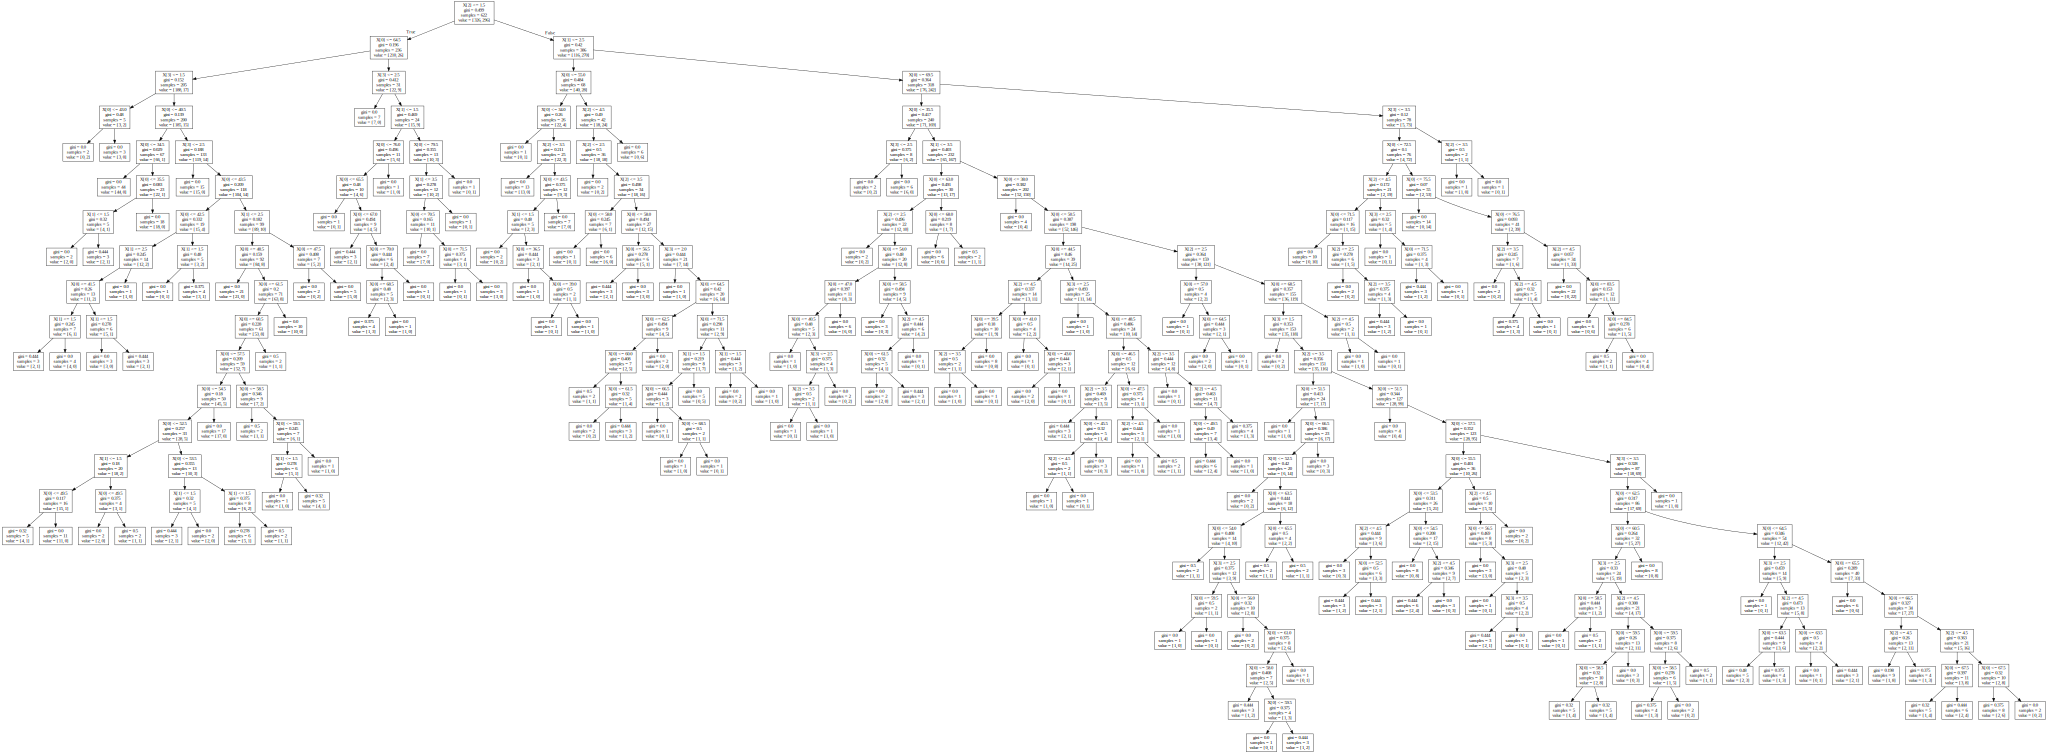

In [22]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt, out_file=None)

graph = graphviz.Source(dot_data)  
graph 

In [23]:
from sklearn.metrics import accuracy_score

In [24]:
print(accuracy_score(y_test, dt.predict(X_test)))

0.730769230769


### Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score

In [53]:
cross_validation = cross_val_score(dt, x_data, target, cv=10)
print(cross_validation)
print('Average of Cross Validation: {}'.format(np.mean(cross_validation)))

[ 0.71428571  0.76190476  0.73809524  0.73493976  0.77108434  0.68674699
  0.72289157  0.76829268  0.76829268  0.69512195]
Average of Cross Validation: 0.7361655681961295


### Random Forests: 

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
rf = RandomForestClassifier()
cross_validation = cross_val_score(rf, x_data, target, cv=10)
print(cross_validation)
print('Average of Cross Validation: {}'.format(np.mean(cross_validation)))

[ 0.71428571  0.78571429  0.73809524  0.78313253  0.79518072  0.68674699
  0.75903614  0.7804878   0.80487805  0.76829268]
Average of Cross Validation: 0.7615850160222772


## SVM


In [123]:
from sklearn.svm import SVC
sv = SVC(kernel='linear')

In [124]:
cross_validation = cross_val_score(sv, x_standard, target, cv=10)
print(cross_validation)
print('Average of Cross Validation: {}'.format(np.mean(cross_validation)))

[ 0.71428571  0.77380952  0.86904762  0.80722892  0.84337349  0.69879518
  0.80722892  0.80487805  0.90243902  0.74390244]
Average of Cross Validation: 0.7964988875362076


#### we get the best results so far

## KNN


In [73]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=10)

In [100]:
cross_validation = cross_val_score(kn, x_standard, target, cv=10)

print(cross_validation)
print('Average of Cross Validation: {}'.format(np.mean(cross_validation)))

[ 0.72619048  0.79761905  0.85714286  0.80722892  0.84337349  0.72289157
  0.8313253   0.7804878   0.79268293  0.76829268]
Average of Cross Validation: 0.7927235072694961


Choosing K is tricky, so we can't discard KNN until we've tried different values of K. Write a for loop to run KNN with K values ranging from 1 to 50 and see if K makes a substantial difference. Make a note of the best performance you could get out of KNN.

In [98]:
avg_acc = []
for k in range(1,51):
    kn = KNeighborsClassifier(n_neighbors=k)
    avg_acc.append(np.mean(cross_val_score(kn, x_standard, target, cv=10)))
    

Best performance: 0.794059513315


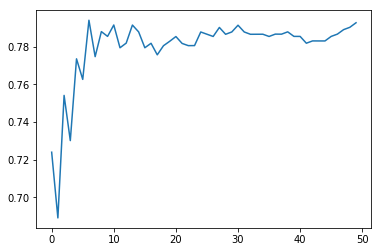

In [99]:
print('Best performance:', max(avg_acc))
plt.plot(avg_acc);

#### the performance improves a lot in the begining but after we have 7 neighbors it is stable or even decreases

## Naive Bayes

Now try naive_bayes.MultinomialNB. How does its accuracy stack up? Hint: you'll need to use MinMaxScaler to get the features in the range MultinomialNB requires.

In [32]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()

In [64]:
cross_validation = cross_val_score(naive, x_data, target, cv=10)
print(cross_validation)
print('Average of Cross Validation: {}'.format(np.mean(cross_validation)))

[ 0.73809524  0.71428571  0.79761905  0.78313253  0.79518072  0.71084337
  0.71084337  0.73170732  0.8902439   0.73170732]
Average of Cross Validation: 0.7603658536585366


## Revisiting SVM

svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Try the rbf, sigmoid, and poly kernels and see what the best-performing kernel is.

In [104]:
sv_rbf = SVC(kernel='rbf')
cross_validation = cross_val_score(sv_rbf, x_standard, target, cv=10)
print(cross_validation)
print('Average of Cross Validation: {}'.format(np.mean(cross_validation)))

[ 0.75        0.79761905  0.86904762  0.80722892  0.86746988  0.72289157
  0.78313253  0.7804878   0.86585366  0.76829268]
Average of Cross Validation: 0.8012023704574396


In [103]:
sv_sigmoid = SVC(kernel='sigmoid')

cross_validation = cross_val_score(sv_sigmoid, x_standard, target, cv=10)

print(cross_validation)
print('Average of Cross Validation: {}'.format(np.mean(cross_validation)))


[ 0.70238095  0.67857143  0.76190476  0.72289157  0.74698795  0.71084337
  0.74698795  0.7804878   0.70731707  0.79268293]
Average of Cross Validation: 0.7351055791108685


In [108]:
sv_poly = SVC(kernel='poly')

cross_validation = cross_val_score(sv_poly, x_standard, target, cv=10)

print(cross_validation)
print('Average of Cross Validation: {}'.format(np.mean(cross_validation)))


[ 0.76190476  0.77380952  0.88095238  0.79518072  0.84337349  0.69879518
  0.77108434  0.79268293  0.86585366  0.74390244]
Average of Cross Validation: 0.792753942599667


## Logistic Regression

We've tried all these fancy techniques, but fundamentally this is just a binary classification problem. Try Logisitic Regression, which is a simple way to tackling this sort of thing.

In [105]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [106]:
cross_validation = cross_val_score(lr, x_data, target, cv=10)

print(cross_validation)
print('Average of Cross Validation: {}'.format(np.mean(cross_validation)))


[ 0.70238095  0.75        0.9047619   0.81927711  0.8313253   0.71084337
  0.77108434  0.80487805  0.90243902  0.76829268]
Average of Cross Validation: 0.7965282733722346


## Do we have a winner?


### the best performances are from SVM and Logistic Regression, maybe we can improve them

In [121]:
lr = LogisticRegression(penalty='l1', C=3.5)
cross_validation = cross_val_score(lr, x_data, target, cv=10)

print(cross_validation)
print('Average of Cross Validation: {}'.format(np.mean(cross_validation)))

[ 0.75        0.76190476  0.88095238  0.81927711  0.8313253   0.71084337
  0.79518072  0.82926829  0.8902439   0.79268293]
Average of Cross Validation: 0.806167877083246


it improved 1%, lets try SVM with the Kernel rbf now

In [122]:
from sklearn.model_selection import GridSearchCV

In [149]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [150]:
grid.fit(x_standard,target)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7697841726618705, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.8115942028985508, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7644927536231884, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7949640287769785, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8043478260869565, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7934782608695652, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=1, kernel=rbf, score=0.782608695652174, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.7841726618705036, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.7934782608695652, total=   0.0s
[CV] C=1, gamma=0.1, kernel=rbf ......................................
[CV]  C=1, gamma=0.1, kernel=rbf, score=0.8152173913043478, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.7985611510791367, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.7971014492753623, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV]  C=1, gamma=0.01, kernel=rbf, score=0.8007246376811594, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ......................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    1.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [158]:
sv_rbf = SVC(kernel='rbf', C=100, gamma=0.01)
cross_validation = cross_val_score(sv_rbf, x_standard, target, cv=10)
print(cross_validation)
print('Average of Cross Validation: {}'.format(np.mean(cross_validation)))

[ 0.77380952  0.78571429  0.86904762  0.79518072  0.86746988  0.73493976
  0.78313253  0.82926829  0.87804878  0.7804878 ]
Average of Cross Validation: 0.8097099198186474


### It didnt improve that much. Logistic Regression and SVM give the best score, with scores very close to each other